In [55]:
%reset -f
import sys
sys.path.insert(0, "..")
from wavhandler import *
import numpy as np
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, classification_report, make_scorer, log_loss
from utils_train import *
import deepdish as dd
from configs import DatasetConfiguration
import os
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sb
import matplotlib.pyplot as plt
from utils import *

splitting = 'custom'
data_setting = 'rawflt'
model_setting = 'conv1d'

csvpath = f"{TEMP_DATADIR}/df_{model_setting}_{data_setting}_{splitting}.csv"

In [56]:
sub = pd.read_csv(csvpath, index_col=None)

In [57]:
splitting = 'custom'
data_setting = 'stftflt'
model_setting = 'DenseNet121'
csvpath = f"{TEMP_DATADIR}/df_{model_setting}_{data_setting}_{splitting}.csv"
sub2 = pd.read_csv(csvpath, index_col=None)

In [58]:
missed = sub[sub.labels != sub.preds]
missed2 = sub2[sub2.labels!= sub2.preds]

# #

In [59]:
sub['hour'] = get_wingbeat_dates(sub.fnames)[1].apply(lambda x: x.hour)

In [60]:
missed = sub[sub.labels != sub.preds]
missed.reset_index(drop=True, inplace=True)
correct = sub[sub.labels == sub.preds]
correct.reset_index(drop=True, inplace=True)

### melanogaster: 0, suzukii: 1, zaprionus: 2

In [61]:
true_suz_pred_mel = sub[(sub.labels==1) & (sub.preds==0)]
true_mel_pred_mel = sub[(sub.labels==0) & (sub.preds==0)]
true_suz_pred_suz = sub[(sub.labels==1) & (sub.preds==1)]

In [62]:
def make_psd(name=''):
    from sklearn import preprocessing
    from scipy import signal
    data, _ = librosa.load(name, sr = SR)
    data = butter_bandpass_filter(data, L_CUTOFF, 1500., fs=F_S, order=B_ORDER)
    _,data = signal.welch(data, fs=8000, scaling='density', window='hanning', nfft=8192, nperseg=256, noverlap=128+64)
    data = preprocessing.normalize(data.reshape(1,-1), norm='l1').T.squeeze()
    data = data.astype(float)
    return data

In [63]:
def make_spectrogram(name='', train_mean=0):
    data, _ = librosa.load(name, sr = SR)
    data = butter_bandpass_filter(data, L_CUTOFF, 1500., fs=F_S, order=B_ORDER)

    data = librosa.stft(data, n_fft = N_FFT, hop_length = HOP_LEN)
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        data = librosa.amplitude_to_db(data)
    data = data.astype(float)
    return data

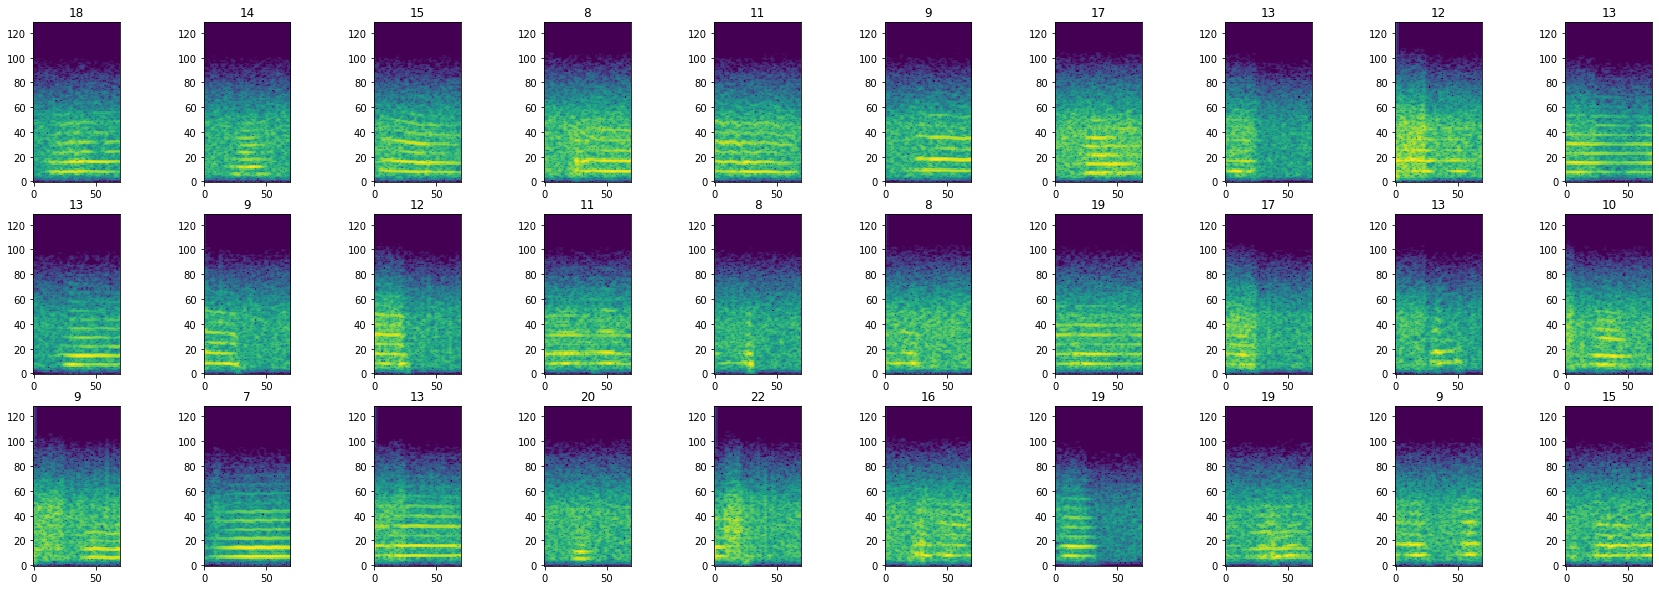

In [76]:
plt.figure(figsize=(30,10))
c=0
for i in range(50):
    plt.subplot(3,10,i+1)
    tmp_df = true_suz_pred_mel
    rdm = np.random.randint(0,tmp_df.shape[0])
    name = tmp_df.fnames.iloc[rdm]
    data = make_spectrogram(name=name)
    plt.imshow(data[:,:70])
    plt.gca().invert_yaxis()
    plt.title(tmp_df.hour.iloc[rdm])
    c+=1
    if c>29:
        break

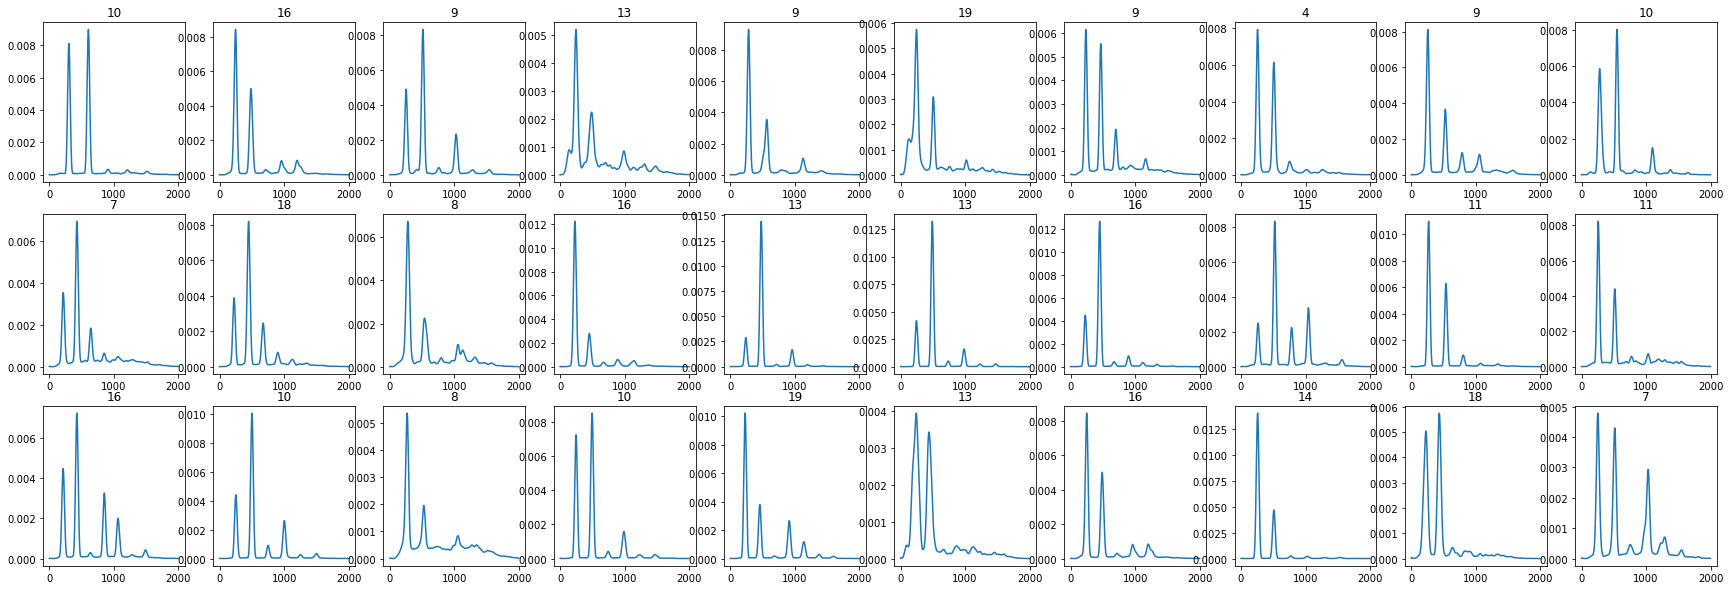

In [67]:
plt.figure(figsize=(30,10))
c=0
for i in range(50):
    plt.subplot(3,10,i+1)
    tmp_df = true_suz_pred_mel
    rdm = np.random.randint(0,tmp_df.shape[0])
    name = tmp_df.fnames.iloc[rdm]
    data = make_psd(name=name)
    plt.plot(data[:2000])
#     plt.gca().invert_yaxis()
    plt.title(tmp_df.hour.iloc[rdm])
    c+=1
    if c>29:
        break

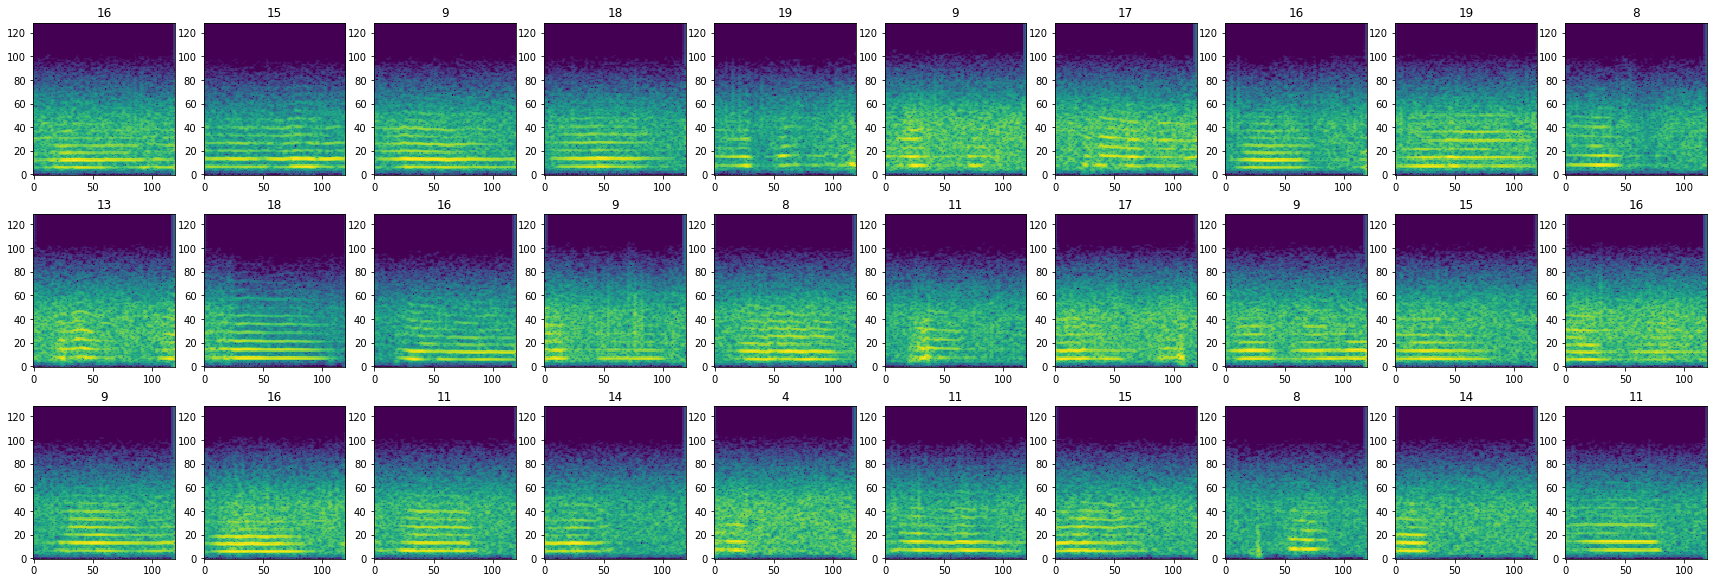

In [68]:
plt.figure(figsize=(30,10))
c=0
for i in range(50):
    plt.subplot(3,10,i+1)
    tmp_df = true_mel_pred_mel
    rdm = np.random.randint(0,tmp_df.shape[0])
    name = tmp_df.fnames.iloc[rdm]
    data = make_spectrogram(name=name)
    plt.imshow(data)#[:100,10:70])
    plt.gca().invert_yaxis()
    plt.title(tmp_df.hour.iloc[rdm])
    c+=1
    if c>29:
        break

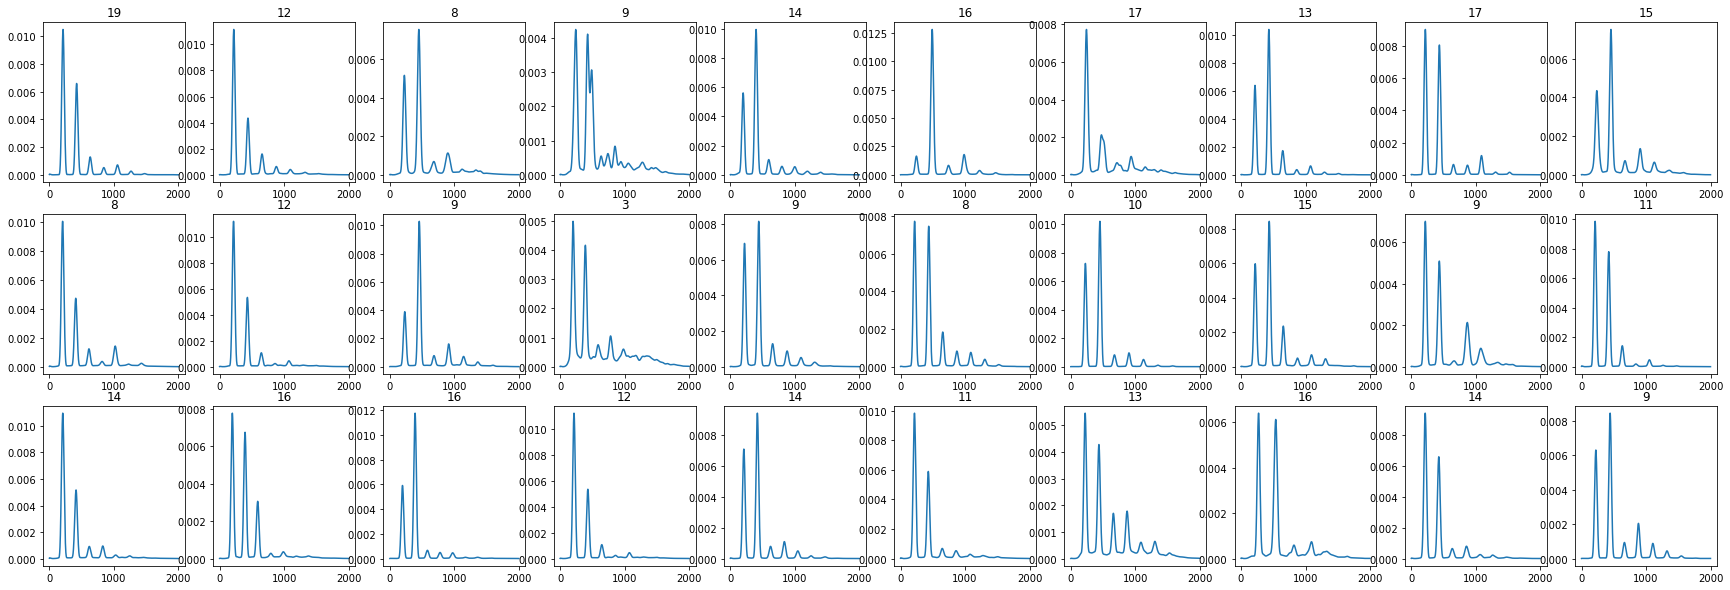

In [71]:
plt.figure(figsize=(30,10))
c=0
for i in range(50):
    plt.subplot(3,10,i+1)
    tmp_df = true_mel_pred_mel
    rdm = np.random.randint(0,tmp_df.shape[0])
    name = tmp_df.fnames.iloc[rdm]
    data = make_psd(name=name)
    plt.plot(data[:2000])
#     plt.gca().invert_yaxis()
    plt.title(tmp_df.hour.iloc[rdm])
    c+=1
    if c>29:
        break

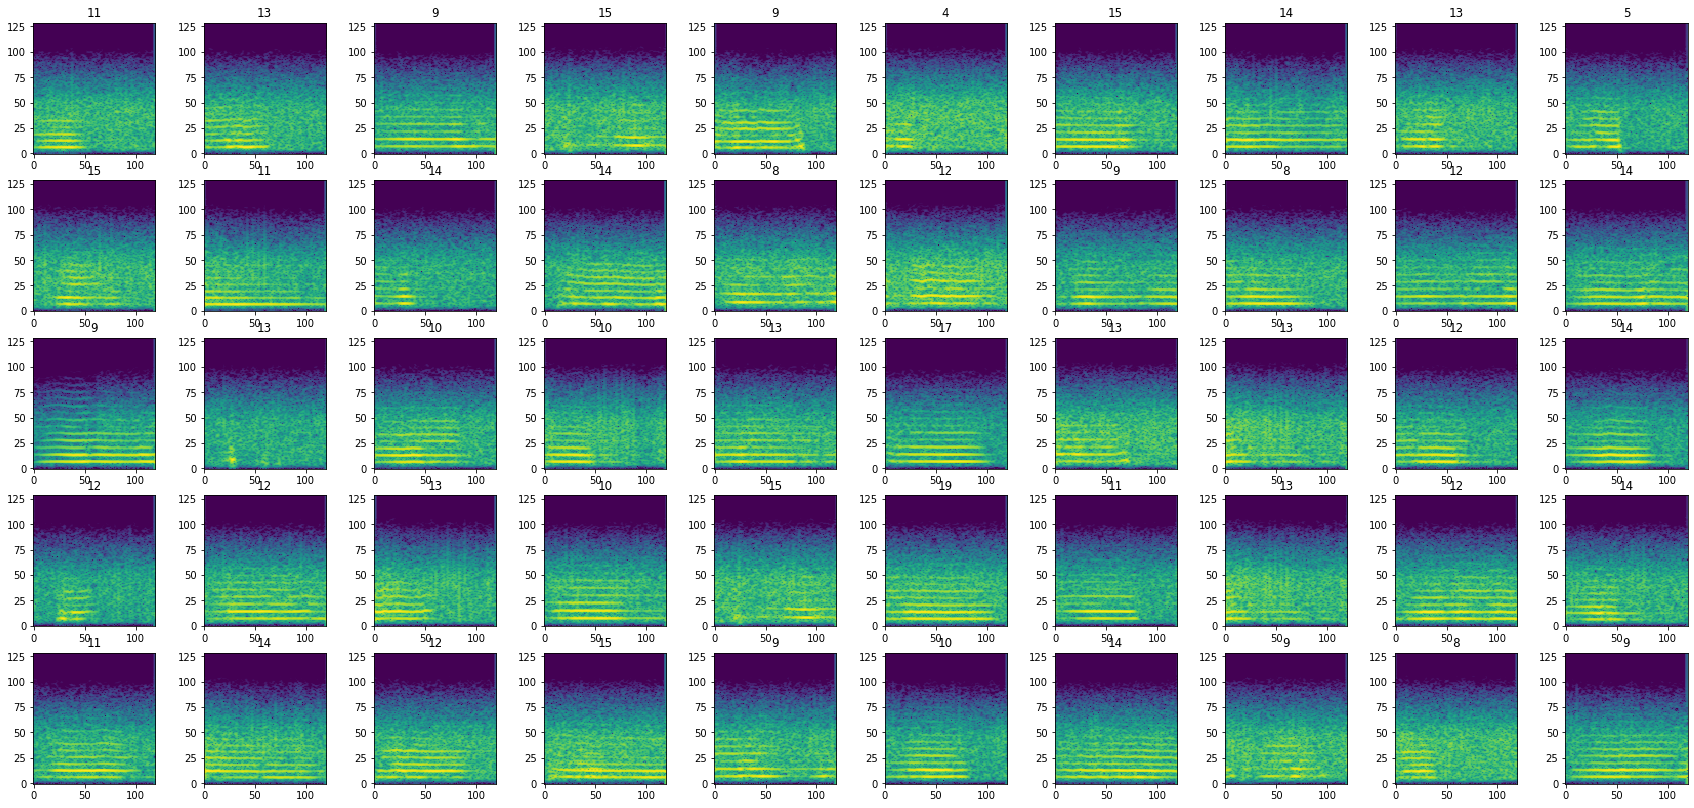

In [12]:
plt.figure(figsize=(30,14))
c=0
for i in range(50):
    plt.subplot(5,10,i+1)
    tmp_df = correct_mel
    rdm = np.random.randint(0,360)
    name = tmp_df.fnames.iloc[rdm]
    data = make_spectrogram(name=name)
    plt.imshow(data)#[:100,10:70])
    plt.gca().invert_yaxis()
    plt.title(tmp_df.hour.iloc[rdm])
    c+=1
    if c>49:
        break

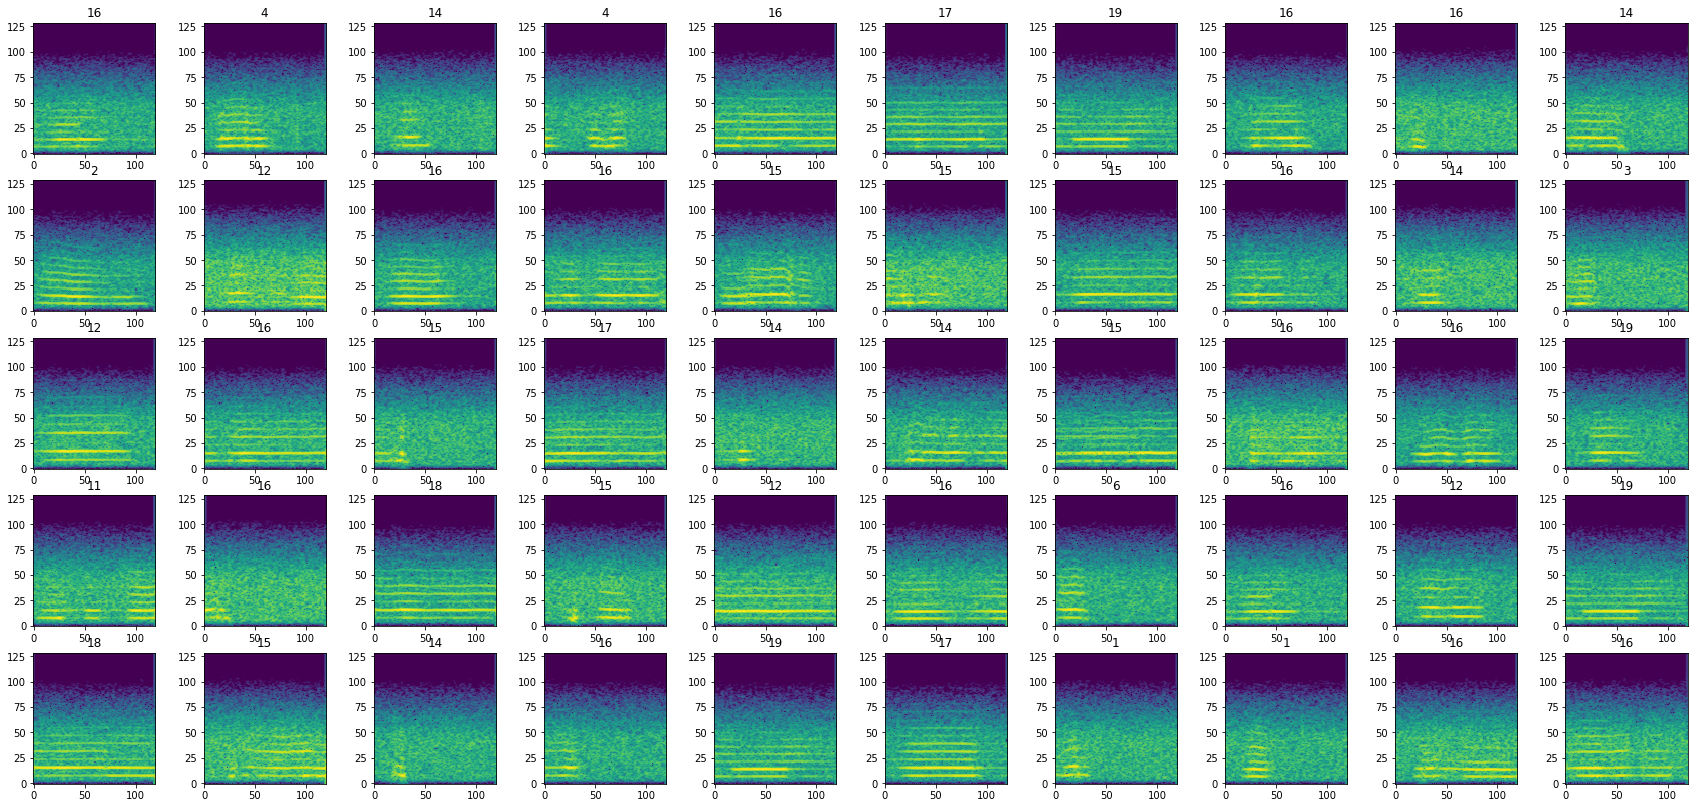

In [13]:
plt.figure(figsize=(30,14))
c=0
for i in range(50):
    plt.subplot(5,10,i+1)
    tmp_df = correct_suz
    rdm = np.random.randint(0,360)
    name = tmp_df.fnames.iloc[rdm]
    data = make_spectrogram(name=name)
    plt.imshow(data)#[:100,10:70])
    plt.gca().invert_yaxis()
    plt.title(tmp_df.hour.iloc[rdm])
    c+=1
    if c>49:
        break

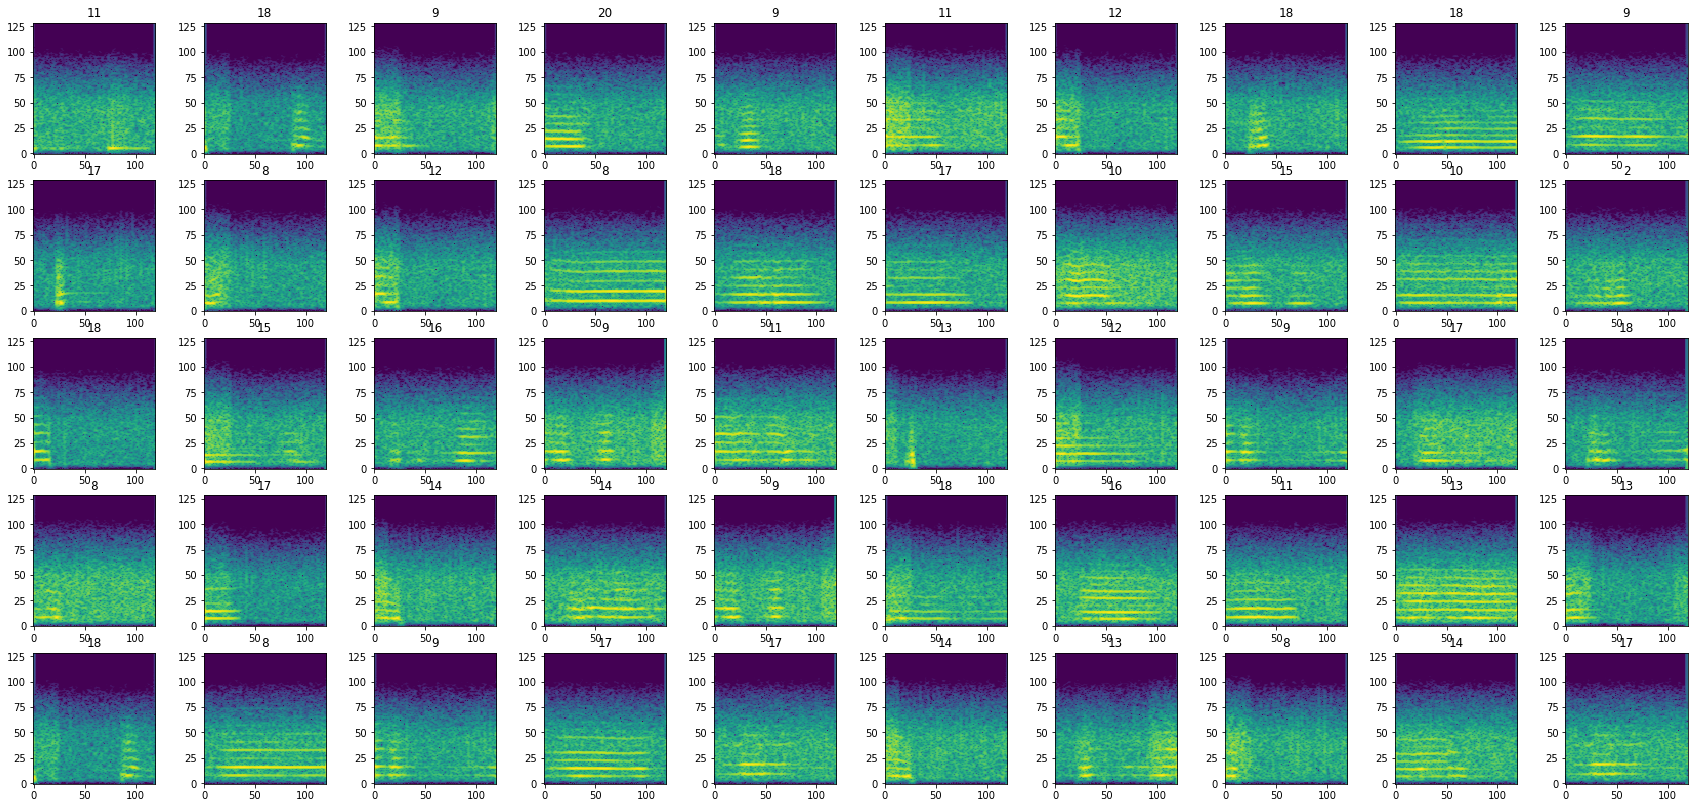

In [14]:
plt.figure(figsize=(30,14))
c=0
for i in range(50):
    plt.subplot(5,10,i+1)
    tmp_df = missed_suz
    rdm = np.random.randint(0,360)
    name = tmp_df.fnames.iloc[rdm]
    data = make_spectrogram(name=name)
    plt.imshow(data)#[:100,10:70])
    plt.gca().invert_yaxis()
    plt.title(tmp_df.hour.iloc[rdm])
    c+=1
    if c>49:
        break